In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('D:\\Practise exercise\\python S1\\cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [5]:
release_dates = pd.read_csv('D:\\Practise exercise\\python S1\\release_dates.csv', index_col=None)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

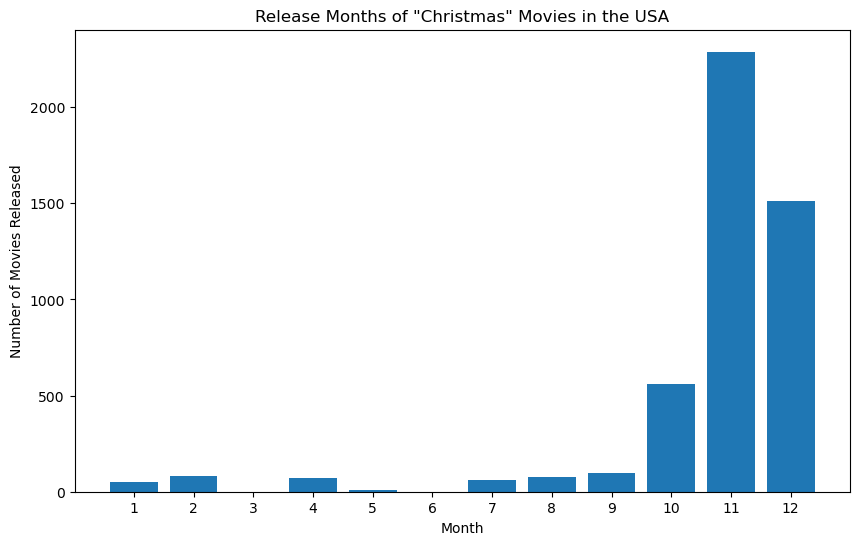

In [6]:
import matplotlib.pyplot as plt

christmas_movies = cast[cast['title'].str.contains('Christmas', case=False, na=False)]

christmas_movies_usa = christmas_movies.merge(release_dates[release_dates['country'] == 'USA'], on='title')

christmas_movies_usa['date'] = pd.to_datetime(christmas_movies_usa['date'])

christmas_movies_usa['release_month'] = christmas_movies_usa['date'].dt.month

monthly_counts = christmas_movies_usa['release_month'].value_counts().sort_index()

monthly_counts = monthly_counts.reindex(range(1, 13), fill_value=0)

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values)
plt.title('Release Months of "Christmas" Movies in the USA')
plt.xlabel('Month')
plt.ylabel('Number of Movies Released')
plt.xticks(monthly_counts.index, [str(i) for i in monthly_counts.index])  # Set tick labels for all 12 months
plt.show()

# Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

                                 title  year_x              name   type  \
50   The Hobbit: An Unexpected Journey    2012   Frazer Anderson  actor   
115  The Hobbit: An Unexpected Journey    2012  Richard Armitage  actor   
180  The Hobbit: An Unexpected Journey    2012  Timothy Bartlett  actor   
245  The Hobbit: An Unexpected Journey    2012      Manu Bennett  actor   
310  The Hobbit: An Unexpected Journey    2012  Jarred Blakiston  actor   

            character     n  year_y country        date  
50          Moria Orc   NaN    2012     USA  2012-12-14  
115            Thorin   3.0    2012     USA  2012-12-14  
180  Master Worrywort  31.0    2012     USA  2012-12-14  
245              Azog  27.0    2012     USA  2012-12-14  
310       Musical Elf   NaN    2012     USA  2012-12-14  


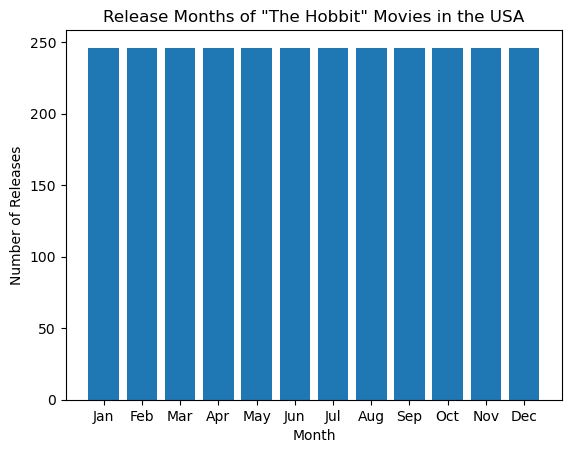

In [7]:
import matplotlib.pyplot as plt

the_hobbit_movies = cast[cast['title'].str.startswith('The Hobbit')]

the_hobbit_usa_release = the_hobbit_movies.merge(release_dates, on='title', how='inner')
the_hobbit_usa_release = the_hobbit_usa_release[the_hobbit_usa_release['country'] == 'USA']

print(the_hobbit_usa_release.head())

the_hobbit_usa_release['date'] = pd.to_datetime(the_hobbit_usa_release['date'])

the_hobbit_usa_release['month'] = the_hobbit_usa_release['date'].dt.month
month_counts = the_hobbit_usa_release['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(month_names, month_counts)
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Release Months of "The Hobbit" Movies in the USA')
plt.show()


# Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

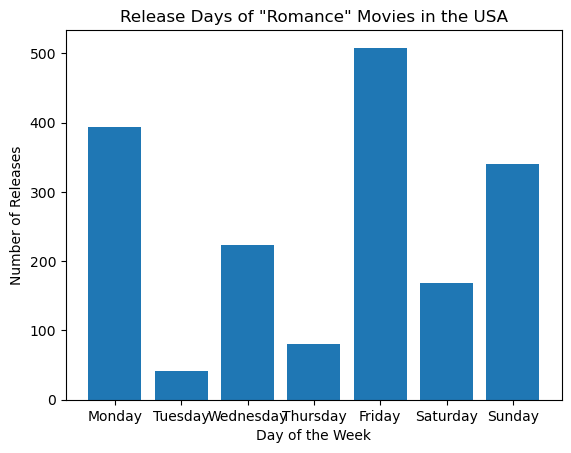

In [8]:
import matplotlib.pyplot as plt

romance_movies = cast[cast['title'].str.contains('Romance', case=False)]

romance_usa_release = romance_movies.merge(release_dates, left_on=['title', 'year'], right_on=['title', 'year'], how='inner')
romance_usa_release = romance_usa_release[romance_usa_release['country'] == 'USA']

romance_usa_release['date'] = pd.to_datetime(romance_usa_release['date'])

romance_usa_release['day_of_week'] = romance_usa_release['date'].dt.day_name()
day_of_week_counts = romance_usa_release['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.bar(day_of_week_counts.index, day_of_week_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Release Days of "Romance" Movies in the USA')
plt.show()


# Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

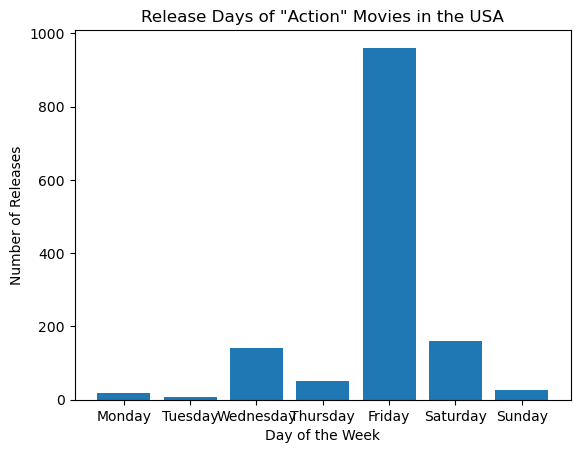

In [9]:
action_movies = cast[cast['title'].str.contains('Action', case=False)]

action_usa_release = action_movies.merge(release_dates, left_on=['title', 'year'], right_on=['title', 'year'], how='inner')
action_usa_release = action_usa_release[action_usa_release['country'] == 'USA']

action_usa_release['date'] = pd.to_datetime(action_usa_release['date'])

action_usa_release['day_of_week'] = action_usa_release['date'].dt.day_name()
day_of_week_counts = action_usa_release['day_of_week'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.bar(day_of_week_counts.index, day_of_week_counts)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.title('Release Days of "Action" Movies in the USA')
plt.show()


# On which date was each Judi Dench movie from the 1990s released in the USA?

In [10]:
judi_dench_movies_1990s = cast[(cast['name'] == 'Judi Dench') & (cast['year'] >= 1990) & (cast['year'] <= 1999)]

judi_dench_movies_1990s_usa_release = judi_dench_movies_1990s.merge(release_dates, on='title', how='inner')
judi_dench_movies_1990s_usa_release = judi_dench_movies_1990s_usa_release[judi_dench_movies_1990s_usa_release['country'] == 'USA']

print(judi_dench_movies_1990s_usa_release[['title', 'date']])

                       title        date
1                  GoldenEye  1995-11-17
40                    Hamlet  1910-02-02
43                    Hamlet  1911-04-15
47                    Hamlet  1921-11-08
65                    Hamlet  1991-01-18
82                    Hamlet  1996-12-25
104                   Hamlet  2000-06-23
118                   Hamlet  2014-01-10
121                   Hamlet  2016-04-24
132             Jack & Sarah  1996-03-22
139                Mrs Brown  1997-10-03
162      Shakespeare in Love  1999-01-08
208       Tea with Mussolini  1999-05-14
234  The World Is Not Enough  1999-11-19
307      Tomorrow Never Dies  1997-12-19


# In which months do films with Judi Dench tend to be released in the USA?

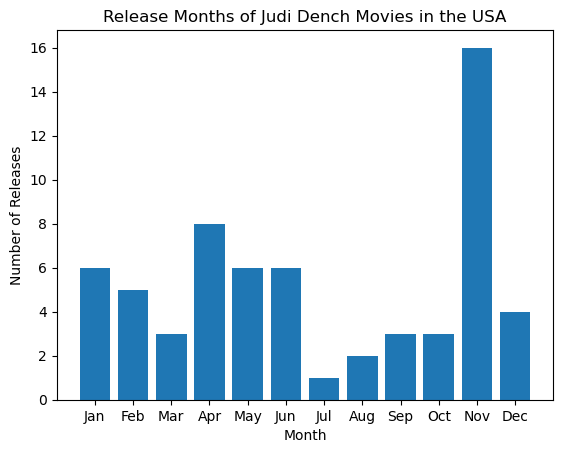

In [11]:
import matplotlib.pyplot as plt

judi_dench_movies = cast[cast['name'] == 'Judi Dench']

judi_dench_movies_usa_release = judi_dench_movies.merge(release_dates, on='title', how='inner')
judi_dench_movies_usa_release = judi_dench_movies_usa_release[judi_dench_movies_usa_release['country'] == 'USA']

judi_dench_movies_usa_release['date'] = pd.to_datetime(judi_dench_movies_usa_release['date'], errors='coerce')

judi_dench_movies_usa_release = judi_dench_movies_usa_release.dropna(subset=['date'])

judi_dench_movies_usa_release['month'] = judi_dench_movies_usa_release['date'].dt.month

month_counts = judi_dench_movies_usa_release['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(month_names, month_counts)
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Release Months of Judi Dench Movies in the USA')
plt.show()


# In which months do films with Tom Cruise tend to be released in the USA?

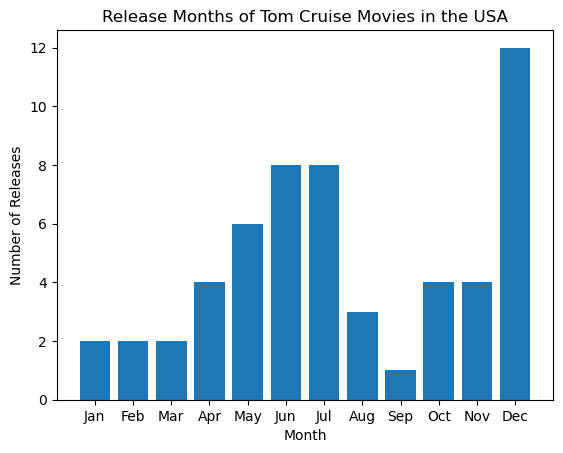

In [12]:
import matplotlib.pyplot as plt

tom_cruise_movies = cast[cast['name'] == 'Tom Cruise']

tom_cruise_movies_usa_release = tom_cruise_movies.merge(release_dates, on='title', how='inner')
tom_cruise_movies_usa_release = tom_cruise_movies_usa_release[tom_cruise_movies_usa_release['country'] == 'USA']

tom_cruise_movies_usa_release['date'] = pd.to_datetime(tom_cruise_movies_usa_release['date'], errors='coerce')

tom_cruise_movies_usa_release = tom_cruise_movies_usa_release.dropna(subset=['date'])

tom_cruise_movies_usa_release['month'] = tom_cruise_movies_usa_release['date'].dt.month

month_counts = tom_cruise_movies_usa_release['month'].value_counts().sort_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.bar(month_names, month_counts)
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Release Months of Tom Cruise Movies in the USA')
plt.show()